用matlab或python编程实现以下三种情况的傅里叶变换，进而比较复原图像的区别，理解傅里叶变换后的幅度谱和相位谱
还没做出来！！！！

Text(0.5, 1.0, '双谱重构图')

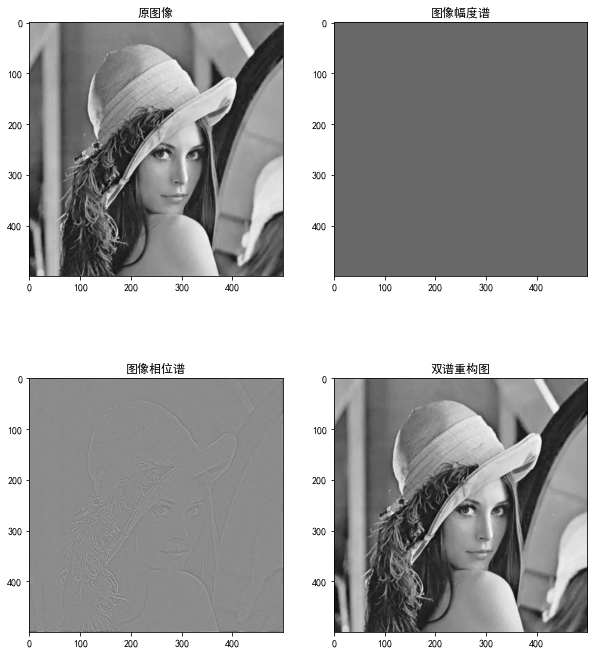

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

Picture_Gray = cv2.imread('.\lena.jpg',0)
 
Picture_FFT = np.fft.fft2(Picture_Gray);# np.fft.fft2()函数：傅里叶变换
Picture_FFT_Shift = np.fft.fftshift(Picture_FFT);# np.fft.fftshift()函数：频谱进行移动，是0频率点在中心

# np.real()函数：返回参数中的实部
Picture_AM_Spectrum = np.real(np.fft.ifft2(np.abs(Picture_FFT_Shift)))  # 获得傅里叶变换的幅度谱
Picture_Phase_Specture = np.real(np.fft.ifft2(np.exp(1j*(np.angle(Picture_FFT)))))  # 获得傅里叶变换的相位谱

Picture_Restructure = np.real(np.fft.ifft2(np.abs(Picture_FFT)*np.exp(1j*(np.angle(Picture_FFT)))));# 双谱重构

plt.figure(figsize=(10, 12))
    
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


plt.figure(1)
plt.subplot(221)
plt.imshow(Picture_Gray , 'gray')
plt.title('原图像')
plt.subplot(222)
plt.imshow(Picture_AM_Spectrum, 'gray')
plt.title('图像幅度谱')
plt.subplot(223)
plt.imshow(Picture_Phase_Specture , 'gray')
plt.title('图像相位谱')
plt.subplot(224)
plt.imshow(Picture_Restructure, 'gray')
plt.title('双谱重构图')